<a href="https://colab.research.google.com/github/VanHeatcliff/AoL-Scientific_Computing/blob/main/Question4_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Faiz Azzam Attanthowi,
NIM : 2802551033

# **Nomor 1**

Sukses memuat 144 titik data produksi.

Metode yang dipilih: Regresi Polinomial Orde ke-4.
Alasan: Metode ini mampu menangkap tren pertumbuhan non-linear jangka
panjang secara akurat dengan menganalisis keseluruhan data historis.

Bentuk Model: P(t) = a*t^4 + b*t^3 + c*t^2 + d*t + e

Nilai Koefisien (presisi 3 digit desimal):
  a = 0.000
  b = -0.004
  c = 0.642
  d = 22.006
  e = 1937.026


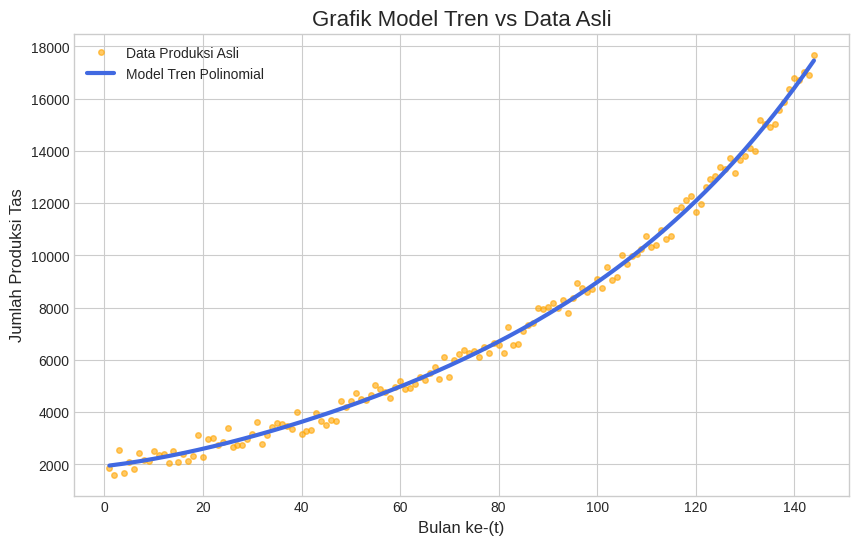

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def temukan_model_tren():
    file_path = 'aol_data(in).csv'
    try:
        df = pd.read_csv(file_path)
        data = df.iloc[0].values

        if len(data) == 144:
            print(f"Sukses memuat {len(data)} titik data produksi.")
        else:
            print(f"Data yang dimuat {len(data)} titik, bukan 144. Analisis dilanjutkan.")

    except Exception as e:
        print(f"Gagal memuat data: {e}. Pastikan file 'aol_data(in).csv' ada.")
        return

    t_data = np.arange(1, len(data) + 1)
    coeffs = np.polyfit(t_data, data, 4)

    print("\nMetode yang dipilih: Regresi Polinomial Orde ke-4.")
    print("Alasan: Metode ini mampu menangkap tren pertumbuhan non-linear jangka")
    print("panjang secara akurat dengan menganalisis keseluruhan data historis.\n")

    print("Bentuk Model: P(t) = a*t^4 + b*t^3 + c*t^2 + d*t + e\n")
    print("Nilai Koefisien (presisi 3 digit desimal):")
    print(f"  a = {coeffs[0]:.3f}")
    print(f"  b = {coeffs[1]:.3f}")
    print(f"  c = {coeffs[2]:.3f}")
    print(f"  d = {coeffs[3]:.3f}")
    print(f"  e = {coeffs[4]:.3f}")

    P_poly_func = np.poly1d(coeffs)
    P_tren = P_poly_func(t_data)

    plt.figure(figsize=(10, 6))
    plt.plot(t_data, data, 'o', color='orange', markersize=4, alpha=0.6, label='Data Produksi Asli')
    plt.plot(t_data, P_tren, color='royalblue', linewidth=3, label='Model Tren Polinomial')
    plt.title("Grafik Model Tren vs Data Asli", fontsize=16)
    plt.xlabel("Bulan ke-(t)", fontsize=12)
    plt.ylabel("Jumlah Produksi Tas", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    temukan_model_tren()

# **Nomor 2**

In [63]:
import numpy as np
import pandas as pd

def konversi_model_ke_numerik():
    file_path = 'aol_data(in).csv'
    try:
        df = pd.read_csv(file_path)
        data = df.iloc[0].values

    except Exception as e:
        print(f"Gagal memuat data: {e}.")
        return

    t_data = np.arange(1, len(data) + 1)

    coeffs = np.polyfit(t_data, data, 4)
    P_poly = np.poly1d(coeffs)

    t0 = len(data)
    P0 = P_poly(t0)
    P1 = np.polyder(P_poly, 1)(t0)
    P2 = np.polyder(P_poly, 2)(t0)
    P3 = np.polyder(P_poly, 3)(t0)

    print("\nBerdasarkan analisis 144 data dengan regresi polinomial orde ke-4,")
    print("nilai-nilai kondisi tren pada t0 = 144 adalah:")
    print(f"  P0 (Posisi)      : {P0:,.3f} unit")
    print(f"  P1 (Kecepatan)   : {P1:,.3f} unit/bulan")
    print(f"  P2 (Percepatan)  : {P2:,.3f} unit/bulan^2")
    print(f"  P3 (Sentakan)    : {P3:,.3f} unit/bulan^3")

if __name__ == '__main__':
    konversi_model_ke_numerik()


Berdasarkan analisis 144 data dengan regresi polinomial orde ke-4,
nilai-nilai kondisi tren pada t0 = 144 adalah:
  P0 (Posisi)      : 17,462.403 unit
  P1 (Kecepatan)   : 272.545 unit/bulan
  P2 (Percepatan)  : 4.572 unit/bulan^2
  P3 (Sentakan)    : 0.072 unit/bulan^3


# **Nomor 3**

Sukses memuat 144 titik data produksi.

Metode yang dipilih: Pencarian Akar Persamaan (Root Finding).
Alasan: Metode ini memberikan solusi yang presisi untuk menemukan
waktu yang tepat saat fungsi prediksi mencapai target kapasitas.

Kapasitas gudang (25,000 tas) akan tercapai pada bulan ke-166.780.
Tanggal estimasi kapasitas tercapai: November 2031.
Pembangunan gudang baru membutuhkan 13 bulan.
Maka, waktu paling lambat untuk mulai membangun adalah:
> October 2030


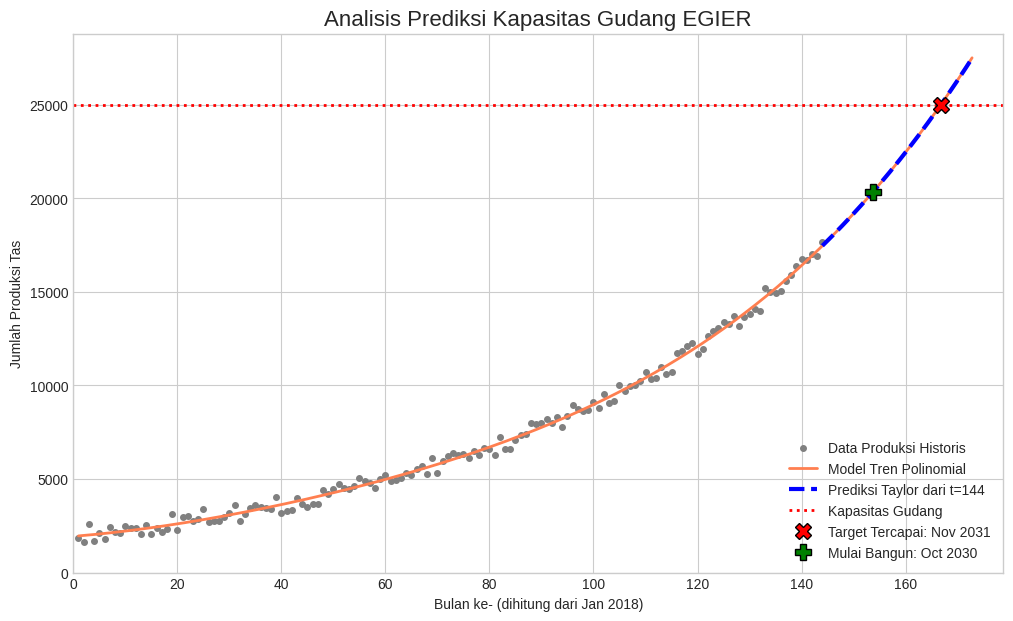

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from datetime import datetime
from dateutil.relativedelta import relativedelta

def analisis_prediksi_gudang():
    file_path = 'aol_data(in).csv'
    try:
        df = pd.read_csv(file_path)
        data = df.iloc[0].values

        if len(data) == 144:
            print(f"Sukses memuat {len(data)} titik data produksi.")
        else:
             print(f"Data yang dimuat {len(data)} titik, bukan 144.")

    except Exception as e:
        print(f"Gagal memuat data: {e}.")
        return

    t_data = np.arange(1, len(data) + 1)
    coeffs = np.polyfit(t_data, data, 4)
    P_poly = np.poly1d(coeffs)
    t0 = len(data)
    P0, P1, P2, P3 = P_poly(t0), np.polyder(P_poly,1)(t0), np.polyder(P_poly,2)(t0), np.polyder(P_poly,3)(t0)

    def P_taylor(t):
        h = t - t0
        return P0 + P1*h + (P2*h**2)/2 + (P3*h**3)/6

    P_max = 25000
    waktu_pembangunan = 13

    def f_root(t):
        return P_taylor(t) - P_max

    t_kritis = None
    try:
        sol = root_scalar(f_root, bracket=[t0, t0 + 300], method='brentq')
        if sol.converged and sol.root > t0:
            t_kritis = sol.root
    except ValueError:
        pass

    print("\nMetode yang dipilih: Pencarian Akar Persamaan (Root Finding).")
    print("Alasan: Metode ini memberikan solusi yang presisi untuk menemukan")
    print("waktu yang tepat saat fungsi prediksi mencapai target kapasitas.\n")

    if t_kritis is not None:
        def konversi_bulan_ke_tanggal(t, start_year=2018, start_month=1):
            tanggal_awal = datetime(start_year, start_month, 1)
            return tanggal_awal + relativedelta(months=int(np.ceil(t))-1)

        tanggal_kapasitas_tercapai = konversi_bulan_ke_tanggal(t_kritis)
        tanggal_mulai_bangun = tanggal_kapasitas_tercapai - relativedelta(months=waktu_pembangunan)

        print(f"Kapasitas gudang ({P_max:,} tas) akan tercapai pada bulan ke-{t_kritis:.3f}.")
        print(f"Tanggal estimasi kapasitas tercapai: {tanggal_kapasitas_tercapai.strftime('%B %Y')}.")
        print(f"Pembangunan gudang baru membutuhkan {waktu_pembangunan} bulan.")
        print("Maka, waktu paling lambat untuk mulai membangun adalah:")
        print(f"> {tanggal_mulai_bangun.strftime('%B %Y')}")
    else:
        print("\nBerdasarkan model, target kapasitas 25.000 tidak tercapai.")

    if t_kritis:
        plt.style.use('seaborn-v0_8-whitegrid')
        fig, ax = plt.subplots(figsize=(12, 7))
        ax.plot(t_data, data, 'o', color='grey', markersize=4, label='Data Produksi Historis')
        t_regresi = np.linspace(1, t_kritis + 6, 500)
        ax.plot(t_regresi, P_poly(t_regresi), label='Model Tren Polinomial', color='coral', lw=2)
        t_taylor = np.linspace(t0, t_kritis + 6, 300)
        ax.plot(t_taylor, P_taylor(t_taylor), label=f'Prediksi Taylor dari t={t0}', color='blue', lw=3, ls='--')
        ax.axhline(P_max, color='red', linestyle=':', lw=2, label=f'Kapasitas Gudang')
        ax.plot(t_kritis, P_max, 'X', c='red', ms=12, markeredgecolor='black', zorder=5, label=f'Target Tercapai: {tanggal_kapasitas_tercapai.strftime("%b %Y")}')
        t_mulai_bangun = t_kritis - waktu_pembangunan
        ax.plot(t_mulai_bangun, P_taylor(t_mulai_bangun), 'P', c='green', ms=12, markeredgecolor='black', zorder=5, label=f'Mulai Bangun: {tanggal_mulai_bangun.strftime("%b %Y")}')
        ax.set_title('Analisis Prediksi Kapasitas Gudang EGIER', fontsize=16)
        ax.set_xlabel('Bulan ke- (dihitung dari Jan 2018)')
        ax.set_ylabel('Jumlah Produksi Tas')
        ax.legend()
        ax.grid(True)
        ax.set_xlim(left=0, right=t_kritis + 12)
        ax.set_ylim(bottom=0)
        plt.show()

if __name__ == '__main__':
    analisis_prediksi_gudang()